# Diabetic Retinopathy Detection

### Objective:
#### People with diabeties can have an eye disease called Diabetic Retinopathy. It is a disease in retina. This is caused when the high blood sugar levels cause damage to blood vessels in the retina. The main Aim is to detect at which stage the disease is. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from PIL import Image
from glob import glob
import tensorflow as tf
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense , Dropout, Flatten , Conv2D,MaxPool2D , MaxPooling2D
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os

In [2]:
def read_images(path,num_img):
    array=np.zeros((num_img,224,224,3))
    i=0
    for img in os.listdir(path):
        img_path=path + "/" + img
        img=Image.open(img_path,mode="r")
        data=np.asarray(img,dtype="uint8")
        array[i]=data
        i+=1
    return array

no_dr_path=r"F:/gaussian_filtered_images/gaussian_filtered_images/No_DR"
num_no_dr=len(glob("F:/gaussian_filtered_images/gaussian_filtered_images/No_DR/*"))
no_dr_array=read_images(no_dr_path,num_no_dr)
no_dr_array=no_dr_array.astype(np.uint8)

mild_path=r"F:/gaussian_filtered_images/gaussian_filtered_images/Mild"
num_mild=len(glob("F:/gaussian_filtered_images/gaussian_filtered_images/Mild/*"))
mild_array=read_images(mild_path,num_mild)
mild_array=mild_array.astype(np.uint8)

moderate_path=r"F:/gaussian_filtered_images/gaussian_filtered_images/Moderate"
num_moderate=len(glob("F:/gaussian_filtered_images/gaussian_filtered_images/Moderate/*"))
moderate_array=read_images(moderate_path,num_moderate)
moderate_array=moderate_array.astype(np.uint8)

proliferate_dr_path=r"F:/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR"
num_proliferate_dr=len(glob("F:/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR/*"))
proliferate_dr_array=read_images(proliferate_dr_path,num_proliferate_dr)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)

severe_path =r"F:/gaussian_filtered_images/gaussian_filtered_images/Severe"
num_severe=len(glob("F:/gaussian_filtered_images/gaussian_filtered_images/Severe/*"))
severe_array=read_images(severe_path,num_severe)
severe_array=severe_array.astype(np.uint8)

In [3]:
print("no_dr_array",no_dr_array.shape)
print("mild_array",mild_array.shape)
print("moderate_array",moderate_array.shape)
print("proliferate_dr_array",proliferate_dr_array.shape)
print("severe_array",severe_array.shape)

no_dr_array (1805, 224, 224, 3)
mild_array (370, 224, 224, 3)
moderate_array (999, 224, 224, 3)
proliferate_dr_array (295, 224, 224, 3)
severe_array (193, 224, 224, 3)


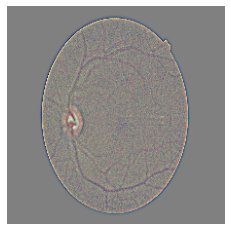

In [4]:
plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

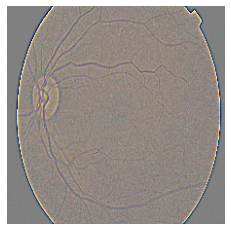

In [5]:
plt.imshow(mild_array[1])
plt.axis("off")
plt.show()

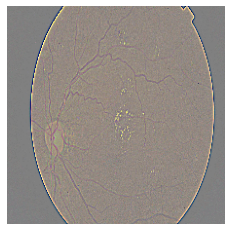

In [6]:
plt.imshow(moderate_array[1])
plt.axis("off")
plt.show()

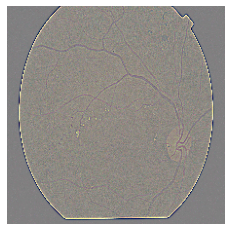

In [7]:
plt.imshow(proliferate_dr_array[1])
plt.axis("off")
plt.show()

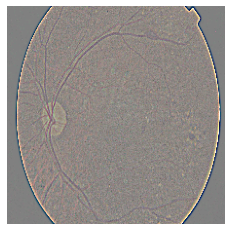

In [8]:
plt.imshow(severe_array[1])
plt.axis("off")
plt.show()

In [9]:
print("num_no_dr:",num_no_dr)
print("num_mild:",num_mild)
print("num_moderate:",num_moderate)
print("num_proliferate_dr:",num_proliferate_dr)
print("num_severe:",num_severe)

num_no_dr: 1805
num_mild: 370
num_moderate: 999
num_proliferate_dr: 295
num_severe: 193


In [10]:
zeros=np.zeros(1805)
ones=np.ones(370)
twos=np.full(999,2)
threes=np.full(295,3)
fours=np.full(193,4)
y = np.concatenate((zeros,ones,twos,threes,fours),axis=0)
print("y shape",y.shape)

y shape (3662,)


In [11]:
def resize_images(img):
    number_of_image=img.shape[0]
    new_array=np.zeros((number_of_image,64,64,3))
    for i in range(number_of_image):
        new_array[i]=cv2.resize(img[i,:,:,:],(64,64))
    return new_array
no_dr_array=resize_images(no_dr_array)
no_dr_array=no_dr_array.astype(np.uint8)
mild_array=resize_images(mild_array)
mild_array=mild_array.astype(np.uint8)
moderate_array=resize_images(moderate_array)
moderate_array=moderate_array.astype(np.uint8)
proliferate_dr_array=resize_images(proliferate_dr_array)
proliferate_dr_array=proliferate_dr_array.astype(np.uint8)
severe_array=resize_images(severe_array)
severe_array=severe_array.astype(np.uint8)

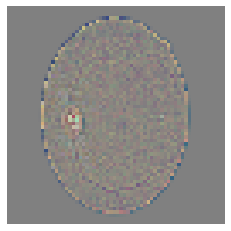

In [12]:
plt.imshow(no_dr_array[1])
plt.axis("off")
plt.show()

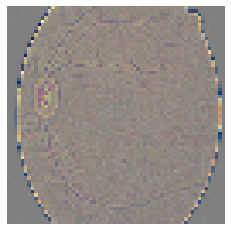

In [13]:
plt.imshow(mild_array[1])
plt.axis("off")
plt.show()

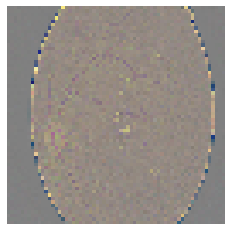

In [14]:
plt.imshow(moderate_array[1])
plt.axis("off")
plt.show()

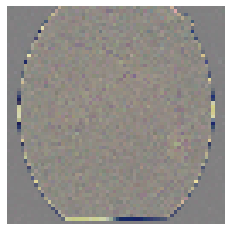

In [15]:
plt.imshow(proliferate_dr_array[1])
plt.axis("off")
plt.show()

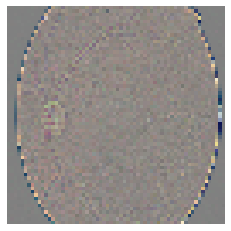

In [16]:
plt.imshow(severe_array[1])
plt.axis("off")
plt.show()

In [17]:
print("no_dr_array",no_dr_array.shape)
print("mild_array",mild_array.shape)
print("moderate_array",moderate_array.shape)
print("proliferate_dr_array",proliferate_dr_array.shape)
print("severe_array",severe_array.shape)

no_dr_array (1805, 64, 64, 3)
mild_array (370, 64, 64, 3)
moderate_array (999, 64, 64, 3)
proliferate_dr_array (295, 64, 64, 3)
severe_array (193, 64, 64, 3)


In [18]:
y = to_categorical(y,5)
print("new y shape",y.shape)

new y shape (3662, 5)


In [19]:
x=np.concatenate((no_dr_array,mild_array,moderate_array,proliferate_dr_array,severe_array),axis=0)
print("x shape",x.shape)
print("x dtype is ",x.dtype)

x shape (3662, 64, 64, 3)
x dtype is  uint8


In [20]:
x=x / 255.0

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2563, 64, 64, 3)
x_test shape (1099, 64, 64, 3)
y_train shape (2563, 5)
y_test shape (1099, 5)


In [22]:
model = Sequential()

model.add(Conv2D(filters=250,kernel_size=(3,3),activation="relu",padding="same",input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=1))

model.add(Conv2D(filters=125,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=1))


model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(750,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(240,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(180,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(5,activation="softmax"))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 250)       7000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 250)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 125)       281375    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 125)       0         
_________________________________________________________________
flatten (Flatten)            (None, 480500)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              492033024 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [23]:
datagen=ImageDataGenerator(
                          shear_range=0.3,
                          horizontal_flip=True,
                          vertical_flip=True,
                          zoom_range=0.3,
                          rotation_range=0.3)
datagen.fit(x_train)

In [24]:
batch_size=32
epochs=35

In [25]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [26]:
checkpoint = ModelCheckpoint('Model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=100,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=100,
                              verbose=1,
                              min_delta=0.0001)

In [27]:
callbacks=[earlystop,checkpoint,reduce_lr]

In [28]:
#hist=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                        #epochs=epochs,validation_data=(x_test,y_test),steps_per_epoch=x_train.shape[0] // batch_size)
history=model.fit_generator(
                datagen.flow(x_train,y_train,batch_size=batch_size),
                steps_per_epoch=2563//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=(x_test,y_test),
                validation_steps=1099//batch_size)


Epoch 1/35
80/80 [==============================] - 2760s 34s/step - loss: 20.2858 - accuracy: 0.3753 - val_loss: 1.3384 - val_accuracy: 0.5050

Epoch 00001: val_loss improved from inf to 1.33840, saving model to Model.h5
Epoch 2/35
80/80 [==============================] - 2533s 31s/step - loss: 1.4415 - accuracy: 0.4724 - val_loss: 1.2759 - val_accuracy: 0.5050

Epoch 00002: val_loss improved from 1.33840 to 1.27588, saving model to Model.h5
Epoch 3/35
80/80 [==============================] - 2820s 35s/step - loss: 1.3177 - accuracy: 0.4760 - val_loss: 1.2608 - val_accuracy: 0.5050

Epoch 00003: val_loss improved from 1.27588 to 1.26079, saving model to Model.h5
Epoch 4/35
80/80 [==============================] - 3206s 40s/step - loss: 1.3240 - accuracy: 0.4956 - val_loss: 1.0343 - val_accuracy: 0.5050

Epoch 00004: val_loss improved from 1.26079 to 1.03432, saving model to Model.h5
Epoch 5/35
80/80 [==============================] - 2667s 33s/step - loss: 1.3754 - accuracy: 0.4825 - 

In [31]:
from keras.models import load_model
prediction =load_model("Model.h5")

In [40]:
accuracy_test = prediction.evaluate(x_test,y_test,verbose=0)
print("Accuracy of test dataset: ",accuracy_test[1])

Accuracy of test dataset:  0.6351228356361389
